In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

C:\Users\halla\anaconda3\envs\MachineLearnign\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 200
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir input
!mkdir outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file input already exists.
A subdirectory or file outputs already exists.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels with smoothening
def label_real_noisy(size, nse):
    data_i = torch.full((size,1), nse)
    data  = torch.bernoulli(data_i)
    return data.to(device)

def label_fake_noisy(size, nse):
    data_i = torch.full((size,1),nse)
    data  = torch.bernoulli(data_i)
    return data.to(device)

def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)

# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:15,  7.48it/s]                         


Epoch 1 of 200
Generator loss: -0.33141011, Discriminator loss: 1.06752013


118it [00:15,  7.77it/s]                         


Epoch 2 of 200
Generator loss: -0.31936396, Discriminator loss: 1.11076740


118it [00:15,  7.60it/s]                         


Epoch 3 of 200
Generator loss: -0.33360078, Discriminator loss: 1.06702966


118it [00:16,  7.18it/s]                         


Epoch 4 of 200
Generator loss: -0.29776332, Discriminator loss: 1.07881330


118it [00:15,  7.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


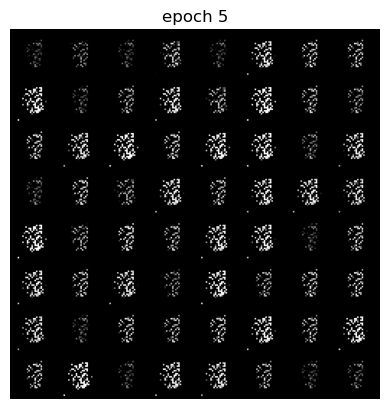

Epoch 5 of 200
Generator loss: -0.41549230, Discriminator loss: 1.10995338


118it [00:15,  7.76it/s]                         


Epoch 6 of 200
Generator loss: -0.35551791, Discriminator loss: 1.06036057


118it [00:15,  7.72it/s]                         


Epoch 7 of 200
Generator loss: -0.43904308, Discriminator loss: 1.20075274


118it [00:15,  7.58it/s]                         


Epoch 8 of 200
Generator loss: -0.48735238, Discriminator loss: 1.22148237


118it [00:15,  7.66it/s]                         


Epoch 9 of 200
Generator loss: -0.45529990, Discriminator loss: 1.20343489


118it [00:15,  7.73it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


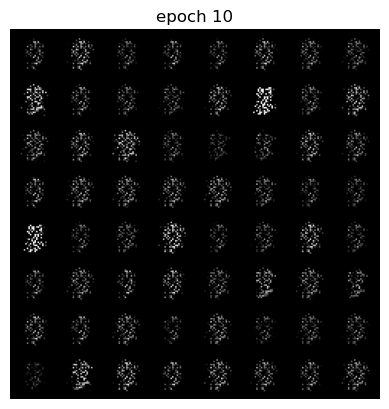

Epoch 10 of 200
Generator loss: -0.48566598, Discriminator loss: 1.22556740


118it [00:15,  7.48it/s]                         


Epoch 11 of 200
Generator loss: -0.39271285, Discriminator loss: 1.17788185


118it [00:15,  7.57it/s]                         


Epoch 12 of 200
Generator loss: -0.53647536, Discriminator loss: 1.25173563


118it [00:14,  7.88it/s]                         


Epoch 13 of 200
Generator loss: -0.38336581, Discriminator loss: 1.14299026


118it [00:15,  7.85it/s]                         


Epoch 14 of 200
Generator loss: -0.46479177, Discriminator loss: 1.23535931


118it [00:15,  7.69it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


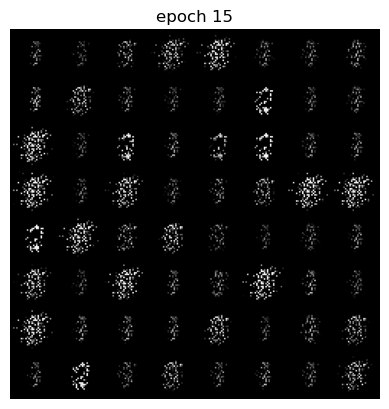

Epoch 15 of 200
Generator loss: -0.38607995, Discriminator loss: 1.14831032


118it [00:15,  7.81it/s]                         


Epoch 16 of 200
Generator loss: -0.36789997, Discriminator loss: 1.13963069


118it [00:14,  7.91it/s]                         


Epoch 17 of 200
Generator loss: -0.41059056, Discriminator loss: 1.12863276


118it [00:14,  7.92it/s]                         


Epoch 18 of 200
Generator loss: -0.35549146, Discriminator loss: 1.10290214


118it [00:15,  7.70it/s]                         


Epoch 19 of 200
Generator loss: -0.43371760, Discriminator loss: 1.17700128


118it [00:15,  7.81it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


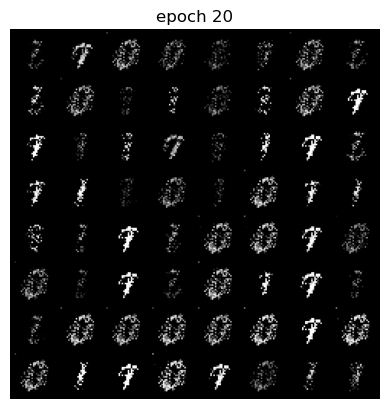

Epoch 20 of 200
Generator loss: -0.39813022, Discriminator loss: 1.15082845


118it [00:15,  7.82it/s]                         


Epoch 21 of 200
Generator loss: -0.41189105, Discriminator loss: 1.16803172


118it [00:15,  7.84it/s]                         


Epoch 22 of 200
Generator loss: -0.42264381, Discriminator loss: 1.14645226


118it [00:15,  7.76it/s]                         


Epoch 23 of 200
Generator loss: -0.43661279, Discriminator loss: 1.20976815


118it [00:15,  7.60it/s]                         


Epoch 24 of 200
Generator loss: -0.48077123, Discriminator loss: 1.20246153


118it [00:15,  7.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


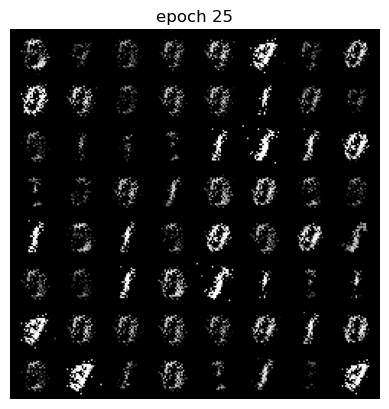

Epoch 25 of 200
Generator loss: -0.44838684, Discriminator loss: 1.20620459


118it [00:15,  7.74it/s]                         


Epoch 26 of 200
Generator loss: -0.49309016, Discriminator loss: 1.21138925


118it [00:15,  7.46it/s]                         


Epoch 27 of 200
Generator loss: -0.42536443, Discriminator loss: 1.15223061


118it [00:15,  7.77it/s]                         


Epoch 28 of 200
Generator loss: -0.45109359, Discriminator loss: 1.21477700


118it [00:15,  7.51it/s]                         


Epoch 29 of 200
Generator loss: -0.43837922, Discriminator loss: 1.16606451


118it [00:15,  7.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


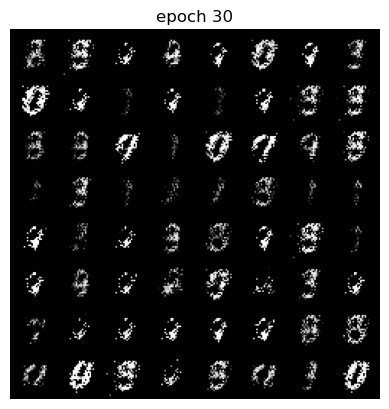

Epoch 30 of 200
Generator loss: -0.42146236, Discriminator loss: 1.16346542


118it [00:15,  7.58it/s]                         


Epoch 31 of 200
Generator loss: -0.44007034, Discriminator loss: 1.16157368


118it [00:16,  7.14it/s]                         


Epoch 32 of 200
Generator loss: -0.42988608, Discriminator loss: 1.16959780


118it [00:16,  7.03it/s]                         


Epoch 33 of 200
Generator loss: -0.44965096, Discriminator loss: 1.21808975


118it [00:17,  6.64it/s]                         


Epoch 34 of 200
Generator loss: -0.50753588, Discriminator loss: 1.25030167


118it [00:18,  6.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


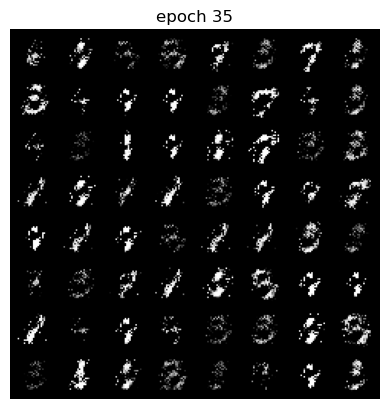

Epoch 35 of 200
Generator loss: -0.45242930, Discriminator loss: 1.17572902


118it [00:17,  6.92it/s]                         


Epoch 36 of 200
Generator loss: -0.44182156, Discriminator loss: 1.17030673


118it [00:15,  7.42it/s]                         


Epoch 37 of 200
Generator loss: -0.47473037, Discriminator loss: 1.19722553


118it [00:16,  7.21it/s]                         


Epoch 38 of 200
Generator loss: -0.46653483, Discriminator loss: 1.21467438


118it [00:15,  7.46it/s]                         


Epoch 39 of 200
Generator loss: -0.50826838, Discriminator loss: 1.24402949


118it [00:15,  7.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


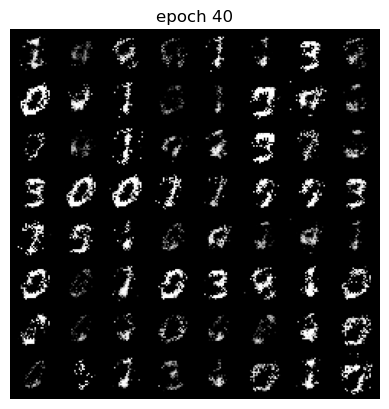

Epoch 40 of 200
Generator loss: -0.47305577, Discriminator loss: 1.20837430


118it [00:15,  7.59it/s]                         


Epoch 41 of 200
Generator loss: -0.52529693, Discriminator loss: 1.25231998


118it [00:16,  7.35it/s]                         


Epoch 42 of 200
Generator loss: -0.45479062, Discriminator loss: 1.18677841


118it [00:15,  7.70it/s]                         


Epoch 43 of 200
Generator loss: -0.45163161, Discriminator loss: 1.19481842


118it [00:15,  7.78it/s]                         


Epoch 44 of 200
Generator loss: -0.46157071, Discriminator loss: 1.19951328


118it [00:15,  7.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


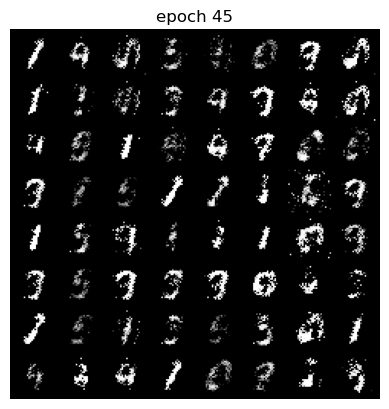

Epoch 45 of 200
Generator loss: -0.46506536, Discriminator loss: 1.20086468


118it [00:15,  7.55it/s]                         


Epoch 46 of 200
Generator loss: -0.49874094, Discriminator loss: 1.23227378


118it [00:15,  7.60it/s]                         


Epoch 47 of 200
Generator loss: -0.47577457, Discriminator loss: 1.20132016


118it [00:15,  7.74it/s]                         


Epoch 48 of 200
Generator loss: -0.46991098, Discriminator loss: 1.19444211


118it [00:15,  7.64it/s]                         


Epoch 49 of 200
Generator loss: -0.48049797, Discriminator loss: 1.20801753


118it [00:15,  7.59it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


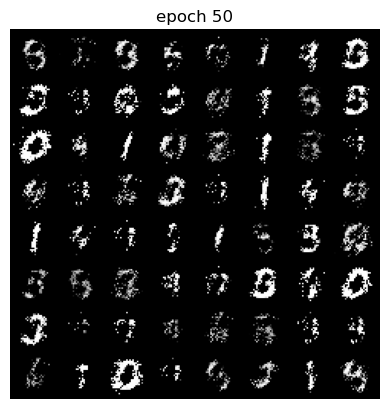

Epoch 50 of 200
Generator loss: -0.46840928, Discriminator loss: 1.20133699


118it [00:15,  7.64it/s]                         


Epoch 51 of 200
Generator loss: -0.48124980, Discriminator loss: 1.21092790


118it [00:15,  7.71it/s]                         


Epoch 52 of 200
Generator loss: -0.51218856, Discriminator loss: 1.23037443


118it [00:15,  7.79it/s]                         


Epoch 53 of 200
Generator loss: -0.46918102, Discriminator loss: 1.19759103


118it [00:15,  7.66it/s]                         


Epoch 54 of 200
Generator loss: -0.47954626, Discriminator loss: 1.21263343


118it [00:15,  7.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


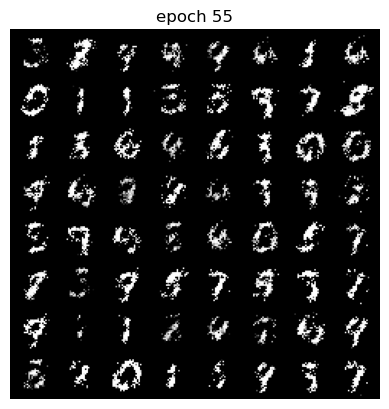

Epoch 55 of 200
Generator loss: -0.47491947, Discriminator loss: 1.20447853


118it [00:15,  7.82it/s]                         


Epoch 56 of 200
Generator loss: -0.44770385, Discriminator loss: 1.17368501


118it [00:15,  7.67it/s]                         


Epoch 57 of 200
Generator loss: -0.51255726, Discriminator loss: 1.24747280


118it [00:16,  7.19it/s]                         


Epoch 58 of 200
Generator loss: -0.51247943, Discriminator loss: 1.23933681


118it [00:15,  7.48it/s]                         


Epoch 59 of 200
Generator loss: -0.48382900, Discriminator loss: 1.21112310


118it [00:15,  7.51it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


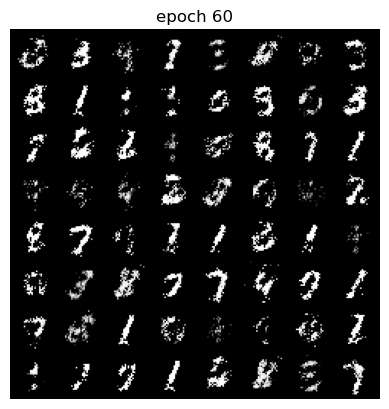

Epoch 60 of 200
Generator loss: -0.50940343, Discriminator loss: 1.22710834


118it [00:16,  6.96it/s]                         


Epoch 61 of 200
Generator loss: -0.49728893, Discriminator loss: 1.22476206


118it [00:16,  7.28it/s]                         


Epoch 62 of 200
Generator loss: -0.50368720, Discriminator loss: 1.22768347


118it [00:15,  7.49it/s]                         


Epoch 63 of 200
Generator loss: -0.51291415, Discriminator loss: 1.23474429


118it [00:15,  7.62it/s]                         


Epoch 64 of 200
Generator loss: -0.48790325, Discriminator loss: 1.20091613


118it [00:15,  7.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


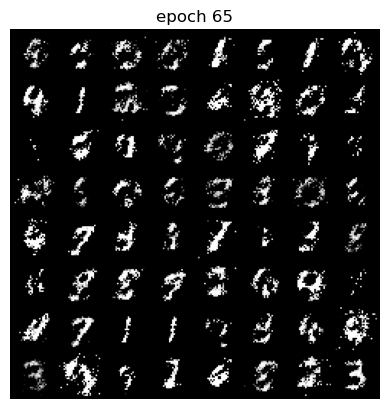

Epoch 65 of 200
Generator loss: -0.50269172, Discriminator loss: 1.22258440


118it [00:15,  7.71it/s]                         


Epoch 66 of 200
Generator loss: -0.52996793, Discriminator loss: 1.25642893


118it [00:15,  7.76it/s]                         


Epoch 67 of 200
Generator loss: -0.50742395, Discriminator loss: 1.24272193


118it [00:15,  7.77it/s]                         


Epoch 68 of 200
Generator loss: -0.48283235, Discriminator loss: 1.20106982


118it [00:15,  7.54it/s]                         


Epoch 69 of 200
Generator loss: -0.52979859, Discriminator loss: 1.25146206


118it [00:15,  7.40it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


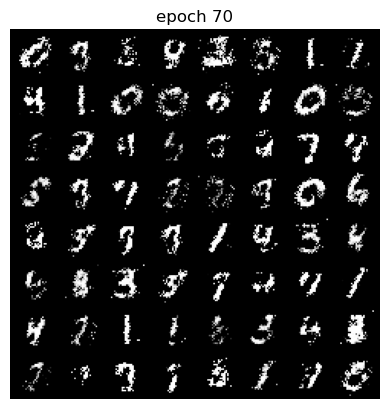

Epoch 70 of 200
Generator loss: -0.50811259, Discriminator loss: 1.23687707


118it [00:15,  7.65it/s]                         


Epoch 71 of 200
Generator loss: -0.54177497, Discriminator loss: 1.25727147


118it [00:15,  7.76it/s]                         


Epoch 72 of 200
Generator loss: -0.52632646, Discriminator loss: 1.25101417


118it [00:15,  7.58it/s]                         


Epoch 73 of 200
Generator loss: -0.55136542, Discriminator loss: 1.26650595


118it [00:15,  7.75it/s]                         


Epoch 74 of 200
Generator loss: -0.56101847, Discriminator loss: 1.26793064


118it [00:15,  7.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


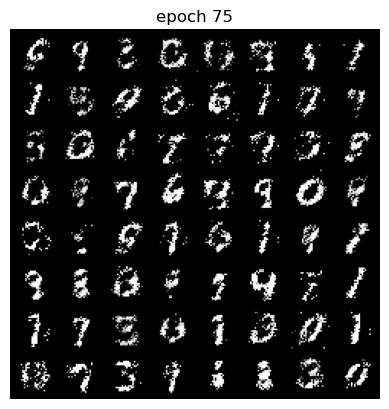

Epoch 75 of 200
Generator loss: -0.51564778, Discriminator loss: 1.24192788


118it [00:15,  7.78it/s]                         


Epoch 76 of 200
Generator loss: -0.51461899, Discriminator loss: 1.23954838


118it [00:15,  7.59it/s]                         


Epoch 77 of 200
Generator loss: -0.53639325, Discriminator loss: 1.25106764


118it [00:15,  7.64it/s]                         


Epoch 78 of 200
Generator loss: -0.53422028, Discriminator loss: 1.25712706


118it [00:15,  7.77it/s]                         


Epoch 79 of 200
Generator loss: -0.52078330, Discriminator loss: 1.24716784


118it [00:15,  7.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


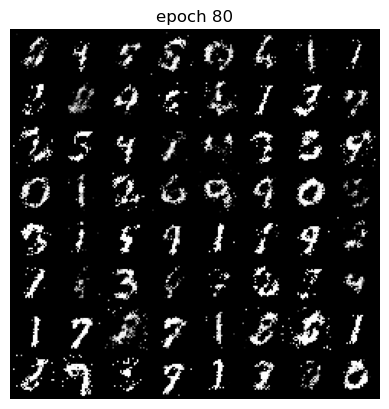

Epoch 80 of 200
Generator loss: -0.51705970, Discriminator loss: 1.22603536


118it [00:15,  7.60it/s]                         


Epoch 81 of 200
Generator loss: -0.50742558, Discriminator loss: 1.23013463


118it [00:15,  7.73it/s]                         


Epoch 82 of 200
Generator loss: -0.54635332, Discriminator loss: 1.26080552


118it [00:15,  7.72it/s]                         


Epoch 83 of 200
Generator loss: -0.52782422, Discriminator loss: 1.23700954


118it [00:15,  7.74it/s]                         


Epoch 84 of 200
Generator loss: -0.51057621, Discriminator loss: 1.23759538


118it [00:15,  7.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


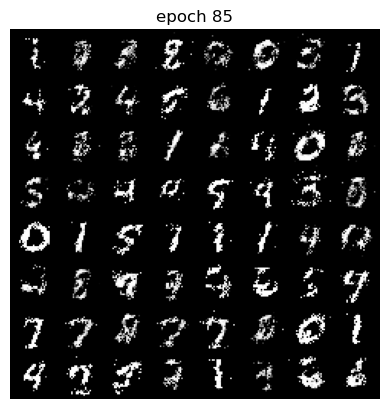

Epoch 85 of 200
Generator loss: -0.53269272, Discriminator loss: 1.25696666


118it [00:15,  7.72it/s]                         


Epoch 86 of 200
Generator loss: -0.54887629, Discriminator loss: 1.26511169


118it [00:15,  7.80it/s]                         


Epoch 87 of 200
Generator loss: -0.52167567, Discriminator loss: 1.24064466


118it [00:15,  7.65it/s]                         


Epoch 88 of 200
Generator loss: -0.53956451, Discriminator loss: 1.26261637


118it [00:15,  7.78it/s]                         


Epoch 89 of 200
Generator loss: -0.53899354, Discriminator loss: 1.26677408


118it [00:15,  7.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


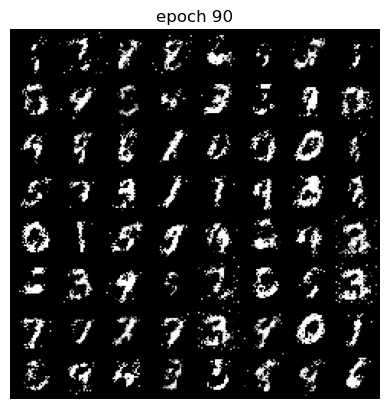

Epoch 90 of 200
Generator loss: -0.53768216, Discriminator loss: 1.25457802


118it [00:15,  7.58it/s]                         


Epoch 91 of 200
Generator loss: -0.49857327, Discriminator loss: 1.21256691


118it [00:15,  7.39it/s]                         


Epoch 92 of 200
Generator loss: -0.55271423, Discriminator loss: 1.27222074


118it [00:15,  7.60it/s]                         


Epoch 93 of 200
Generator loss: -0.52498222, Discriminator loss: 1.24844653


118it [00:15,  7.70it/s]                         


Epoch 94 of 200
Generator loss: -0.57006082, Discriminator loss: 1.28499404


118it [00:15,  7.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


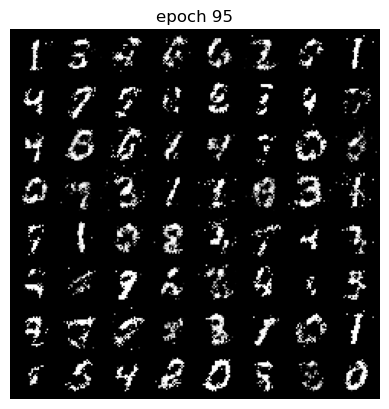

Epoch 95 of 200
Generator loss: -0.57127286, Discriminator loss: 1.28581407


118it [00:15,  7.79it/s]                         


Epoch 96 of 200
Generator loss: -0.55728378, Discriminator loss: 1.27745299


118it [00:15,  7.80it/s]                         


Epoch 97 of 200
Generator loss: -0.56178269, Discriminator loss: 1.27922828


118it [00:15,  7.81it/s]                         


Epoch 98 of 200
Generator loss: -0.54655303, Discriminator loss: 1.25948291


118it [00:15,  7.79it/s]                         


Epoch 99 of 200
Generator loss: -0.57014061, Discriminator loss: 1.29548852


118it [00:15,  7.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


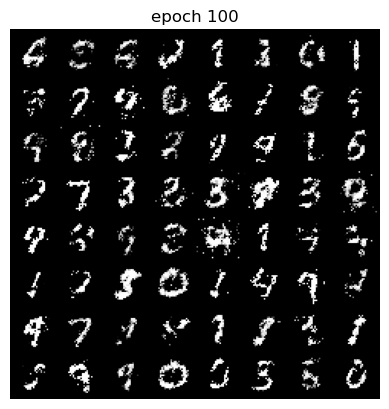

Epoch 100 of 200
Generator loss: -0.53460642, Discriminator loss: 1.24908498


118it [00:15,  7.57it/s]                         


Epoch 101 of 200
Generator loss: -0.55561027, Discriminator loss: 1.27702164


118it [00:15,  7.72it/s]                         


Epoch 102 of 200
Generator loss: -0.55085291, Discriminator loss: 1.26118619


118it [00:15,  7.77it/s]                         


Epoch 103 of 200
Generator loss: -0.54384687, Discriminator loss: 1.25505281


118it [00:15,  7.76it/s]                         


Epoch 104 of 200
Generator loss: -0.54989228, Discriminator loss: 1.26342590


118it [00:15,  7.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


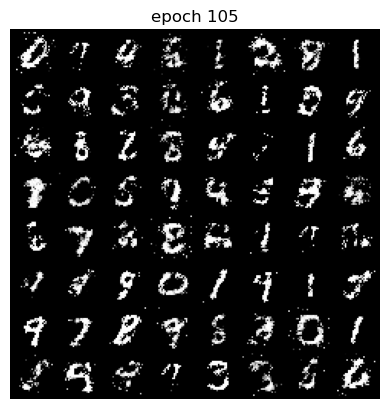

Epoch 105 of 200
Generator loss: -0.54963034, Discriminator loss: 1.27284276


118it [00:15,  7.79it/s]                         


Epoch 106 of 200
Generator loss: -0.57043704, Discriminator loss: 1.28499774


118it [00:15,  7.76it/s]                         


Epoch 107 of 200
Generator loss: -0.55504916, Discriminator loss: 1.27353877


118it [00:15,  7.77it/s]                         


Epoch 108 of 200
Generator loss: -0.56583855, Discriminator loss: 1.28268344


118it [00:15,  7.70it/s]                         


Epoch 109 of 200
Generator loss: -0.58523764, Discriminator loss: 1.28823271


118it [00:15,  7.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


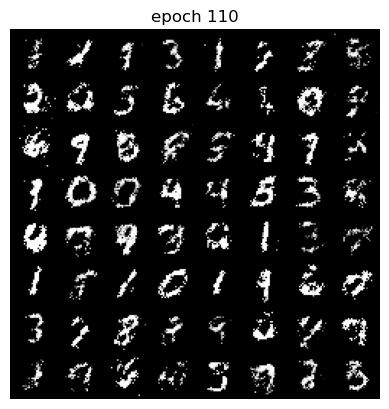

Epoch 110 of 200
Generator loss: -0.56618715, Discriminator loss: 1.27755279


118it [00:15,  7.62it/s]                         


Epoch 111 of 200
Generator loss: -0.56530704, Discriminator loss: 1.28166060


118it [00:15,  7.58it/s]                         


Epoch 112 of 200
Generator loss: -0.53294761, Discriminator loss: 1.26048881


118it [00:15,  7.77it/s]                         


Epoch 113 of 200
Generator loss: -0.57672137, Discriminator loss: 1.28422915


118it [00:15,  7.68it/s]                         


Epoch 114 of 200
Generator loss: -0.58699507, Discriminator loss: 1.30083259


118it [00:15,  7.69it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


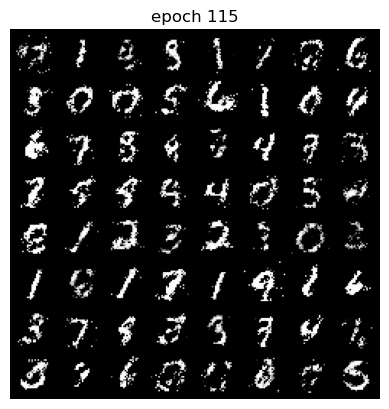

Epoch 115 of 200
Generator loss: -0.57208673, Discriminator loss: 1.28831486


118it [00:15,  7.66it/s]                         


Epoch 116 of 200
Generator loss: -0.57268810, Discriminator loss: 1.28872796


118it [00:15,  7.64it/s]                         


Epoch 117 of 200
Generator loss: -0.56432870, Discriminator loss: 1.28329824


118it [00:15,  7.55it/s]                         


Epoch 118 of 200
Generator loss: -0.57369935, Discriminator loss: 1.29077215


118it [00:15,  7.70it/s]                         


Epoch 119 of 200
Generator loss: -0.59081214, Discriminator loss: 1.30983696


118it [00:15,  7.76it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


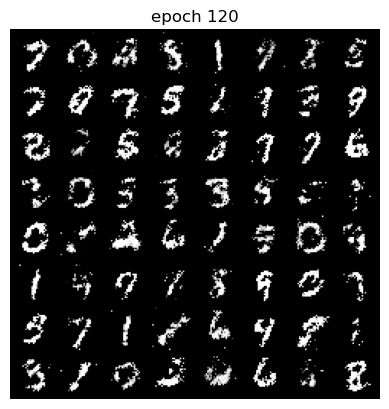

Epoch 120 of 200
Generator loss: -0.55469293, Discriminator loss: 1.27324276


118it [00:15,  7.78it/s]                         


Epoch 121 of 200
Generator loss: -0.58043023, Discriminator loss: 1.29695703


118it [00:15,  7.39it/s]                         


Epoch 122 of 200
Generator loss: -0.58916064, Discriminator loss: 1.29906783


118it [00:16,  7.16it/s]                         


Epoch 123 of 200
Generator loss: -0.54079297, Discriminator loss: 1.26653446


118it [00:15,  7.59it/s]                         


Epoch 124 of 200
Generator loss: -0.60576264, Discriminator loss: 1.30274792


118it [00:15,  7.76it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


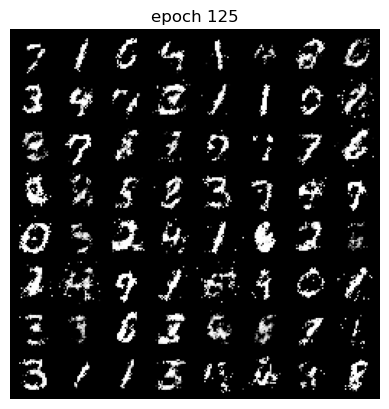

Epoch 125 of 200
Generator loss: -0.57886579, Discriminator loss: 1.28182134


118it [00:17,  6.93it/s]                         


Epoch 126 of 200
Generator loss: -0.57767100, Discriminator loss: 1.29235810


118it [00:15,  7.61it/s]                         


Epoch 127 of 200
Generator loss: -0.58013607, Discriminator loss: 1.29811374


118it [00:15,  7.58it/s]                         


Epoch 128 of 200
Generator loss: -0.57852826, Discriminator loss: 1.30072183


118it [00:15,  7.67it/s]                         


Epoch 129 of 200
Generator loss: -0.56020830, Discriminator loss: 1.27280373


118it [00:15,  7.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


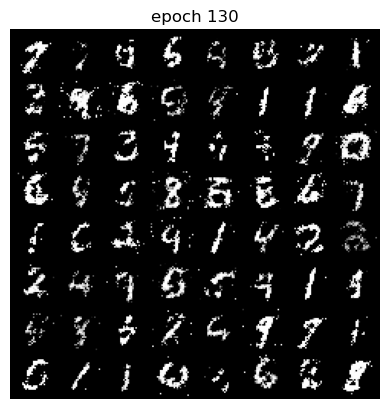

Epoch 130 of 200
Generator loss: -0.56074610, Discriminator loss: 1.27356559


118it [00:15,  7.57it/s]                         


Epoch 131 of 200
Generator loss: -0.57960938, Discriminator loss: 1.29145919


118it [00:15,  7.62it/s]                         


Epoch 132 of 200
Generator loss: -0.58481256, Discriminator loss: 1.29177830


118it [00:15,  7.57it/s]                         


Epoch 133 of 200
Generator loss: -0.58387149, Discriminator loss: 1.30209593


118it [00:15,  7.55it/s]                         


Epoch 134 of 200
Generator loss: -0.57378287, Discriminator loss: 1.29566931


118it [00:15,  7.60it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


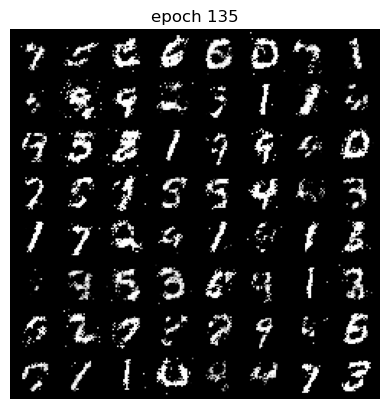

Epoch 135 of 200
Generator loss: -0.57111598, Discriminator loss: 1.29225333


118it [00:15,  7.41it/s]                         


Epoch 136 of 200
Generator loss: -0.59485362, Discriminator loss: 1.31129609


118it [00:15,  7.54it/s]                         


Epoch 137 of 200
Generator loss: -0.60231256, Discriminator loss: 1.31774086


118it [00:15,  7.72it/s]                         


Epoch 138 of 200
Generator loss: -0.58040188, Discriminator loss: 1.30398244


118it [00:15,  7.71it/s]                         


Epoch 139 of 200
Generator loss: -0.59241054, Discriminator loss: 1.30372294


118it [00:15,  7.64it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


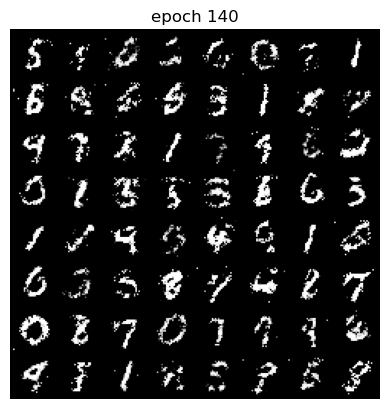

Epoch 140 of 200
Generator loss: -0.59673412, Discriminator loss: 1.31501435


118it [00:15,  7.71it/s]                         


Epoch 141 of 200
Generator loss: -0.58249728, Discriminator loss: 1.29516417


118it [00:15,  7.72it/s]                         


Epoch 142 of 200
Generator loss: -0.58347880, Discriminator loss: 1.30330692


118it [00:15,  7.64it/s]                         


Epoch 143 of 200
Generator loss: -0.55254571, Discriminator loss: 1.27758746


118it [00:15,  7.67it/s]                         


Epoch 144 of 200
Generator loss: -0.56400417, Discriminator loss: 1.27566140


118it [00:15,  7.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


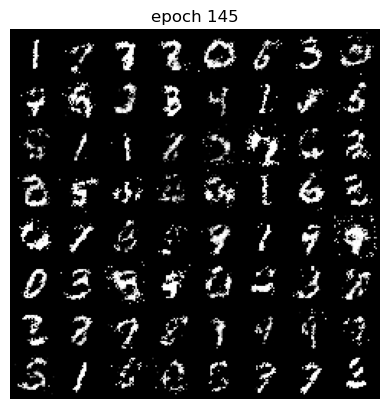

Epoch 145 of 200
Generator loss: -0.58595311, Discriminator loss: 1.29975409


118it [00:15,  7.68it/s]                         


Epoch 146 of 200
Generator loss: -0.60052796, Discriminator loss: 1.31533784


118it [00:15,  7.61it/s]                         


Epoch 147 of 200
Generator loss: -0.57948931, Discriminator loss: 1.29546645


118it [00:15,  7.67it/s]                         


Epoch 148 of 200
Generator loss: -0.58442436, Discriminator loss: 1.30262509


118it [00:15,  7.70it/s]                         


Epoch 149 of 200
Generator loss: -0.57307952, Discriminator loss: 1.28502711


118it [00:15,  7.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


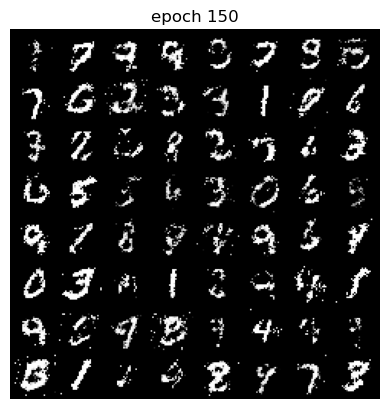

Epoch 150 of 200
Generator loss: -0.59986454, Discriminator loss: 1.30693517


118it [00:15,  7.74it/s]                         


Epoch 151 of 200
Generator loss: -0.57178912, Discriminator loss: 1.29344158


118it [00:15,  7.73it/s]                         


Epoch 152 of 200
Generator loss: -0.58845374, Discriminator loss: 1.29403110


118it [00:15,  7.72it/s]                         


Epoch 153 of 200
Generator loss: -0.58843042, Discriminator loss: 1.29225438


118it [00:15,  7.74it/s]                         


Epoch 154 of 200
Generator loss: -0.58050633, Discriminator loss: 1.29856344


118it [00:15,  7.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


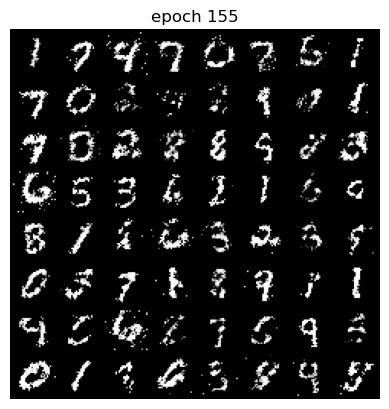

Epoch 155 of 200
Generator loss: -0.59818704, Discriminator loss: 1.31072522


118it [00:15,  7.72it/s]                         


Epoch 156 of 200
Generator loss: -0.61601436, Discriminator loss: 1.31503934


118it [00:15,  7.78it/s]                         


Epoch 157 of 200
Generator loss: -0.60285279, Discriminator loss: 1.30535732


118it [00:15,  7.74it/s]                         


Epoch 158 of 200
Generator loss: -0.58955816, Discriminator loss: 1.30864047


118it [00:15,  7.73it/s]                         


Epoch 159 of 200
Generator loss: -0.59528613, Discriminator loss: 1.31350089


118it [00:15,  7.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


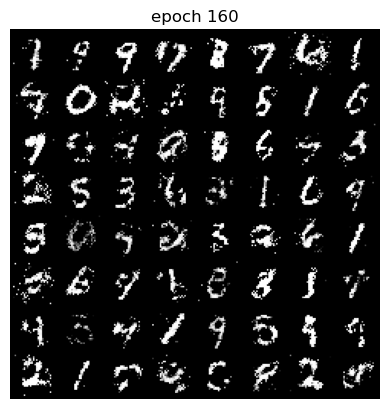

Epoch 160 of 200
Generator loss: -0.62768715, Discriminator loss: 1.33634824


118it [00:15,  7.69it/s]                         


Epoch 161 of 200
Generator loss: -0.64432091, Discriminator loss: 1.35065879


118it [00:15,  7.66it/s]                         


Epoch 162 of 200
Generator loss: -0.61559266, Discriminator loss: 1.32658051


118it [00:15,  7.55it/s]                         


Epoch 163 of 200
Generator loss: -0.60422676, Discriminator loss: 1.31025299


118it [00:15,  7.59it/s]                         


Epoch 164 of 200
Generator loss: -0.59763612, Discriminator loss: 1.31802036


118it [00:15,  7.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


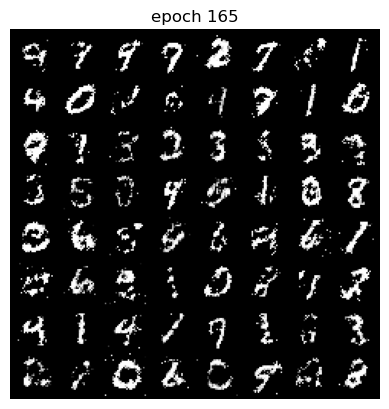

Epoch 165 of 200
Generator loss: -0.62175450, Discriminator loss: 1.33280767


118it [00:15,  7.64it/s]                         


Epoch 166 of 200
Generator loss: -0.60907539, Discriminator loss: 1.32156871


118it [00:15,  7.59it/s]                         


Epoch 167 of 200
Generator loss: -0.59290466, Discriminator loss: 1.31357991


118it [00:15,  7.70it/s]                         


Epoch 168 of 200
Generator loss: -0.60223079, Discriminator loss: 1.32005483


118it [00:15,  7.62it/s]                         


Epoch 169 of 200
Generator loss: -0.59812074, Discriminator loss: 1.31055972


118it [00:15,  7.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


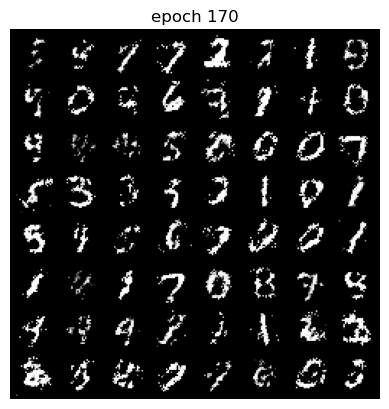

Epoch 170 of 200
Generator loss: -0.57340921, Discriminator loss: 1.28939221


118it [00:15,  7.68it/s]                         


Epoch 171 of 200
Generator loss: -0.58051131, Discriminator loss: 1.28920422


118it [00:15,  7.46it/s]                         


Epoch 172 of 200
Generator loss: -0.57678307, Discriminator loss: 1.29066293


118it [00:16,  7.35it/s]                         


Epoch 173 of 200
Generator loss: -0.57120398, Discriminator loss: 1.28902365


118it [00:15,  7.79it/s]                         


Epoch 174 of 200
Generator loss: -0.57489690, Discriminator loss: 1.28933093


118it [00:15,  7.61it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


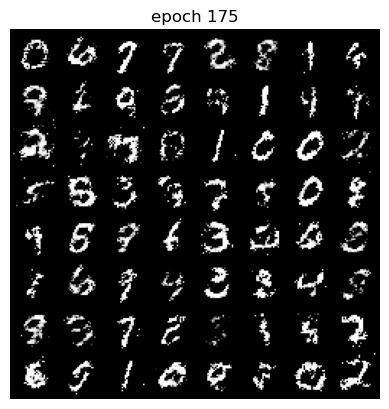

Epoch 175 of 200
Generator loss: -0.59902897, Discriminator loss: 1.30918051


118it [00:16,  7.30it/s]                         


Epoch 176 of 200
Generator loss: -0.61363448, Discriminator loss: 1.31714729


118it [00:15,  7.52it/s]                         


Epoch 177 of 200
Generator loss: -0.59547288, Discriminator loss: 1.30278479


118it [00:15,  7.55it/s]                         


Epoch 178 of 200
Generator loss: -0.60425631, Discriminator loss: 1.31701084


118it [00:15,  7.50it/s]                         


Epoch 179 of 200
Generator loss: -0.60226359, Discriminator loss: 1.31494568


118it [00:15,  7.69it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


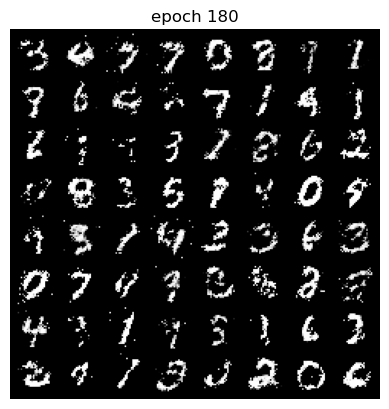

Epoch 180 of 200
Generator loss: -0.60637041, Discriminator loss: 1.31031226


118it [00:15,  7.73it/s]                         


Epoch 181 of 200
Generator loss: -0.58344881, Discriminator loss: 1.30617356


118it [00:15,  7.73it/s]                         


Epoch 182 of 200
Generator loss: -0.60480738, Discriminator loss: 1.32004890


118it [00:15,  7.72it/s]                         


Epoch 183 of 200
Generator loss: -0.61759172, Discriminator loss: 1.33143377


118it [00:15,  7.64it/s]                         


Epoch 184 of 200
Generator loss: -0.61485323, Discriminator loss: 1.32375803


118it [00:15,  7.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


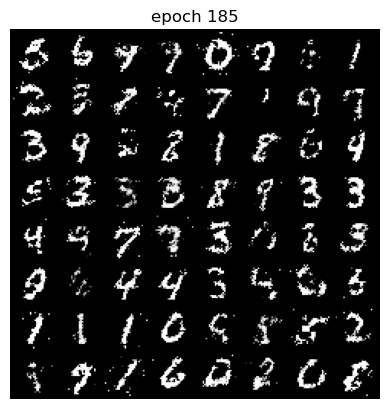

Epoch 185 of 200
Generator loss: -0.60124113, Discriminator loss: 1.31413838


118it [00:15,  7.76it/s]                         


Epoch 186 of 200
Generator loss: -0.59558292, Discriminator loss: 1.31689870


118it [00:15,  7.72it/s]                         


Epoch 187 of 200
Generator loss: -0.60847406, Discriminator loss: 1.33016072


118it [00:15,  7.79it/s]                         


Epoch 188 of 200
Generator loss: -0.61240766, Discriminator loss: 1.32512526


118it [00:15,  7.42it/s]                         


Epoch 189 of 200
Generator loss: -0.60354521, Discriminator loss: 1.31839851


118it [00:15,  7.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


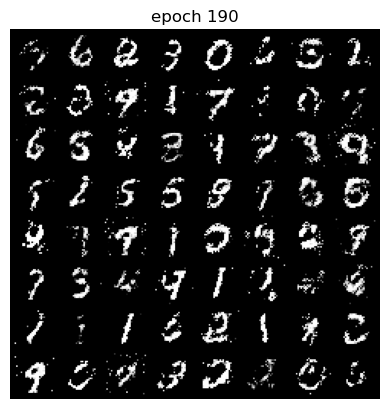

Epoch 190 of 200
Generator loss: -0.60673741, Discriminator loss: 1.31409276


118it [00:15,  7.71it/s]                         


Epoch 191 of 200
Generator loss: -0.61057916, Discriminator loss: 1.32138390


118it [00:15,  7.63it/s]                         


Epoch 192 of 200
Generator loss: -0.60364718, Discriminator loss: 1.31767027


118it [00:16,  7.31it/s]                         


Epoch 193 of 200
Generator loss: -0.61435071, Discriminator loss: 1.32768693


118it [00:16,  7.06it/s]                         


Epoch 194 of 200
Generator loss: -0.61843383, Discriminator loss: 1.33771901


118it [00:15,  7.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


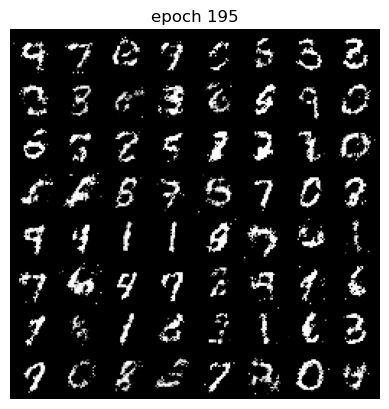

Epoch 195 of 200
Generator loss: -0.61261154, Discriminator loss: 1.32581158


118it [00:15,  7.85it/s]                         


Epoch 196 of 200
Generator loss: -0.62091197, Discriminator loss: 1.33739109


118it [00:15,  7.58it/s]                         


Epoch 197 of 200
Generator loss: -0.61613801, Discriminator loss: 1.32100292


118it [00:15,  7.82it/s]                         


Epoch 198 of 200
Generator loss: -0.60359844, Discriminator loss: 1.31627695


118it [00:15,  7.71it/s]                         


Epoch 199 of 200
Generator loss: -0.60989961, Discriminator loss: 1.31898402


118it [00:16,  7.31it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


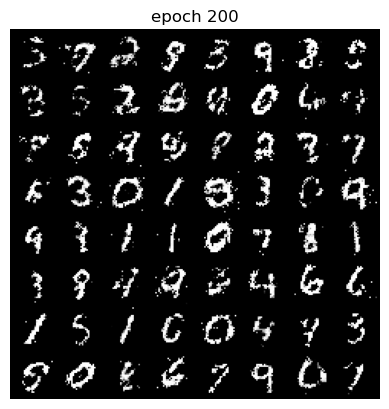

Epoch 200 of 200
Generator loss: -0.59231882, Discriminator loss: 1.31067440


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE #########
    return 1
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return 1
    
noise1 = 0.85
noise0 = 0.15
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0

    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        real_images = data[0]
        fake_images = generator(noise)
       
        optim_d.zero_grad()
        #Update discriminator for real images.
        labels_d = discriminator(real_images)
        dl_real = criterion(labels_d, label_real_noisy(real_images.size(0), noise1))
        dl_real.backward()
        loss_d += dl_real.item() 
    
    
        #Update discriminator for fake images created from noise.
        labels_d = discriminator(fake_images)
        dl_fake = criterion(labels_d, label_fake_noisy(fake_images.size(0), noise0))
        dl_fake.backward()
        loss_d += dl_fake.item()
                
        optim_d.step()
        
        
        ##GENERATOR:
        fake_images = generator(noise)
        optim_g.zero_grad()
        labels_d = discriminator(fake_images)
        #Generator loss how many images discriminator was able to identify as fake, smaller the better. Run gradient ascent on it.
        gl_fake = -criterion(labels_d, label_fake(fake_images.size(0)))
        gl_fake.backward()
        optim_g.step()
        
        
        ##Print loss
        loss_g += gl_fake.item()
    
        ######################################
    
    #Update Noise to labels
    #if((epoch+1)%10 == 0):
    #    noise1=  noise1 + 0.02
    #    noise0=  noise0 - 0.02
    #    print(noise1, noise0)
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

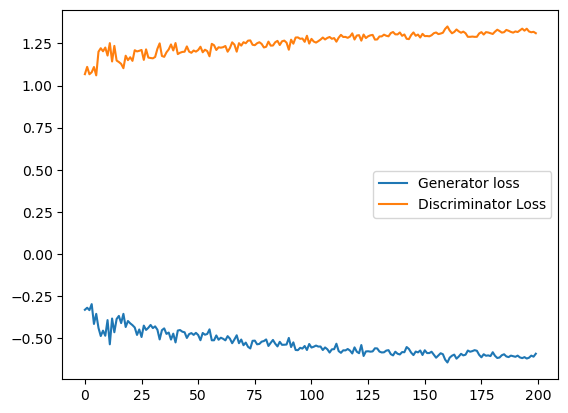

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')